


> Thêm khối trích dẫn



In [1]:
# Mount GDrive to load data
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import numpy as np #thư viện cho tính toán số học và xử lý mảng đa chiều
import matplotlib.pyplot as plt #tv vẽ biểu đồ hình ảnh
from sklearn import neighbors, datasets #neighbors : bao gồm các thuật toán như KNN
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics # Thư viện kiểm tra độ chính xác
from io import StringIO
import pandas as pd #Thư viện để xử lý và phân tích dữ liệu, đặc biệt là với các cấu trúc dữ liệu dạng bảng như DataFrame.
import seaborn as sns #Thư viện cho việc vẽ biểu đồ, xây dựng trên Matplotlib
from sklearn.preprocessing import OneHotEncoder #chuyển đổi các biến phân loại thành dạng nhị phân
from sklearn.metrics import mean_squared_error #Một hàm để tính toán sai số bình phương trung bình, thường dùng để đánh giá mô hình hồi quy.
from sklearn import metrics
from sklearn.model_selection import GridSearchCV #Cung cấp các công cụ để phân chia dữ liệu và tối ưu hóa mô hình
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier #Mô hình mạng nơ-ron đa lớp.
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score #Hàm để tính toán độ chính xác của mô hình.

In [3]:
# Đọc dữ liệu tập train
print("Dữ liệu Loan Train")
Tr_data = pd.read_csv('/content/drive/MyDrive/datast/loan_data (1).csv')
Tr_data.head()  #hiển thị 5 dòng đầu của Tr_data

Dữ liệu Loan Train


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y


EDA dữ liệu

In [ ]:

# Kiểm tra số lượng bản ghi
Tr_data.count()

,0
Loan_ID,381
Gender,376
Married,381
Dependents,373
Education,381
Self_Employed,360
ApplicantIncome,381
CoapplicantIncome,381
LoanAmount,381
Loan_Amount_Term,370


In [ ]:
print(f"training set (row, col): {Tr_data.shape}")#\n\ntesting set (row, col): {Ts_data.shape}")

training set (row, col): (381, 13)


In [ ]:
#->thông tin chi tiết về Tr_data, gồm : cấu trúc, loại dữ liệu của các cột, số lượng giá trị null, và mô tả thống kê
#Thông tin về cột trong dataset(hiển thị chi tiết, số lượng giá trị null)
Tr_data.info(verbose=True)

#Mô tả về dataset
Tr_data.head()
# Tr_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381 entries, 0 to 380
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            381 non-null    object 
 1   Gender             376 non-null    object 
 2   Married            381 non-null    object 
 3   Dependents         373 non-null    object 
 4   Education          381 non-null    object 
 5   Self_Employed      360 non-null    object 
 6   ApplicantIncome    381 non-null    int64  
 7   CoapplicantIncome  381 non-null    float64
 8   LoanAmount         381 non-null    float64
 9   Loan_Amount_Term   370 non-null    float64
 10  Credit_History     351 non-null    float64
 11  Property_Area      381 non-null    object 
 12  Loan_Status        381 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 38.8+ KB


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y


In [5]:
#Bỏ đi cột Loan_ID(id, thao tác trên cột(1), thay đổi trực tiếp trên DataFrame mà ko cần gán cho biến mới)
#->thuộc tính này k ảnh hưởng đến chất lượng của bộ data train->bỏ đi vì train sẽ k đạt dc chất lượng tốt nhất và giảm đi độ chính xác

# Lưu trữ cột Loan_ID
loan_ids = Tr_data['Loan_ID'].copy()  # Sử dụng copy() để lưu trữ dữ liệu

# Kiểm tra lại Loan_ID đã được lưu trữ
print("Stored Loan_ID:", loan_ids)

Tr_data.drop('Loan_ID',axis=1,inplace=True)

#checking the new shapes
print(f"training set (row, col): {Tr_data.shape}")


Stored Loan_ID: 0      LP001003
1      LP001005
2      LP001006
3      LP001008
4      LP001013
         ...   
376    LP002953
377    LP002974
378    LP002978
379    LP002979
380    LP002990
Name: Loan_ID, Length: 381, dtype: object
training set (row, col): (381, 12)


In [6]:
#Giá trị bị thiếu theo tổng các giá trị và sắp xếp lớn về bé
Tr_data.isnull().sum().sort_values(ascending=False)
# sử dụng thư viện pandas để phân tích dữ liệu
#isnull : kiểm tra từng giá trị trong Tr_data xem có phải gtri null hay ko. kết quả trả về là DataFrame cùng kích thước ( true-null / false-ko null)
#sum : sau khi có dataframe chứa giá trị True và False  -> sum sẽ tính tổng gtri null trên kết quả của isnull cho mỗi cột trog Tr_data.  Kết quả là một Series với tên cột và số lượng giá trị null tương ứng.
#.sort_values: sắp xếp từ lớn về nhỏ

#-> xác định cột nào trong dataset có nhiều giá trị bị thiếu, từ đó giúp mình quyết định cách xử lý (như loại bỏ cột, thay thế giá trị null, v.v.).

,0
Credit_History,30
Self_Employed,21
Loan_Amount_Term,11
Dependents,8
Gender,5
Married,0
Education,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0


XỬ LÝ GIÁ TRỊ THIẾU


In [7]:
# điền các giá trị bị thiếu trong một DataFrame bằng cách sử dụng giá trị mode của mỗi cột
#->in ra trước + sau khi điều gtri thiếu  ------> điền null = mode ( gtri xuất hiện nhiều nhất )

#Điền đầy đủ các giá trị bị thiếu
print("Trước khi điền các giá trị thiếu\n\n","#"*50,"\n")
null_cols = ['Credit_History', 'Self_Employed','Dependents', 'Loan_Amount_Term', 'Gender'] #Khai báo một ds các cột trong DataFrame mà muốn điền giá trị thiếu.


for col in null_cols: #lặp qua từng cột trong null_cols
    # tên của cột xét: số lượng xuất hiện của mỗi giá trị  ----> Đối với mỗi cột trong null_cols, in ra số lượng xuất hiện của mỗi giá trị hiện có trong cột đó trước khi điền.
    print(f"{col}:\n{Tr_data[col].value_counts()}\n","-"*50)
    Tr_data[col] = Tr_data[col].fillna(  #thay thế các gtri thiếu = mode của cột đó.
        Tr_data[col].dropna().mode().values[0] ) # dùng dropma để loại bỏ các gtri thiếu trước khi tính mode.
                                                 #trong trường hợp nếu có nhiều giá trị có cùng số lần xuất hiện, thì values[0] sẽ lấy giá trị mode đầu tiên
    #cột dữ liệu. loại bỏ giá trị thiếu. bù theo mode. giá trị đầu trong dải mode

Tr_data.isnull().sum().sort_values(ascending=False)

print("Sau khi điền các giá trị bị thiếu\n\n","#"*50,"\n")
for col in null_cols:
    print(f"\n{col}:\n{Tr_data[col].value_counts()}\n","-"*50)

Tr_data.head()

Trước khi điền các giá trị thiếu

 ################################################## 

Credit_History:
Credit_History
1.0    294
0.0     57
Name: count, dtype: int64
 --------------------------------------------------
Self_Employed:
Self_Employed
No     325
Yes     35
Name: count, dtype: int64
 --------------------------------------------------
Dependents:
Dependents
0     234
2      59
1      52
3+     28
Name: count, dtype: int64
 --------------------------------------------------
Loan_Amount_Term:
Loan_Amount_Term
360.0    312
180.0     29
480.0     11
300.0      7
120.0      3
84.0       3
240.0      2
60.0       1
12.0       1
36.0       1
Name: count, dtype: int64
 --------------------------------------------------
Gender:
Gender
Male      291
Female     85
Name: count, dtype: int64
 --------------------------------------------------
Sau khi điền các giá trị bị thiếu

 ################################################## 


Credit_History:
Credit_History
1.0    324
0.0     57
Name

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y


In [8]:
#Check du lieu được dien day
Tr_data.to_csv("du lieu da xu li.csv")

TÁCH DỮ LIỆU THÀNH 2 NHÓM

In [9]:


#danh sách các cột là giá trị số
num = Tr_data.select_dtypes('number').columns.to_list()  #Chọn các cột có kiểu dữ liệu là số , Chuyển đổi tên các cột thành một danh sách.

#danh sách các cột category
cat = Tr_data.select_dtypes('object').columns.to_list() #Chọn các cột có kiểu dữ liệu là object (thường là chuỗi), chuyển thành 1 ds

# print("num", num)
# print("cat", cat)

#tạo dataframe mới từ các cột số và cột phân loại
#numeric df
loan_num =  Tr_data[num]

#categoric df
loan_cat = Tr_data[cat]

#in ra nội dung của 2 dataframe để thấy dữ liệu được phân loại
print ("loan_num", loan_num)
print ("loan_cat", loan_cat)

loan_num      ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               4583             1508.0       128.0             360.0   
1               3000                0.0        66.0             360.0   
2               2583             2358.0       120.0             360.0   
3               6000                0.0       141.0             360.0   
4               2333             1516.0        95.0             360.0   
..               ...                ...         ...               ...   
376             5703                0.0       128.0             360.0   
377             3232             1950.0       108.0             360.0   
378             2900                0.0        71.0             360.0   
379             4106                0.0        40.0             180.0   
380             4583                0.0       133.0             360.0   

     Credit_History  
0               1.0  
1               1.0  
2               1.0  
3               1.0  
4   

In [ ]:
#Số lượng của từng giá trị ở cột loan status là cột category cuối
print(Tr_data[cat[-1]].value_counts())


Loan_Status
Y    271
N    110
Name: count, dtype: int64


vẽ loan_num


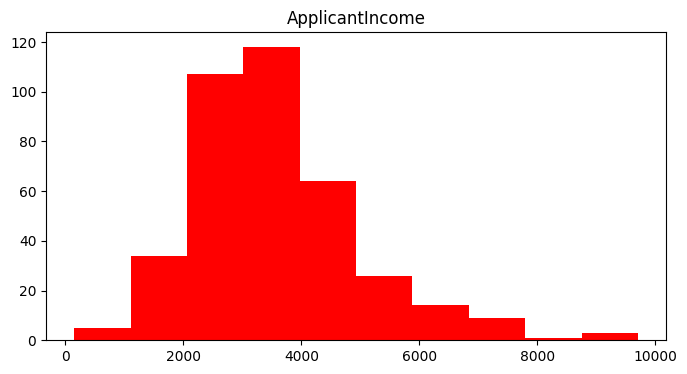

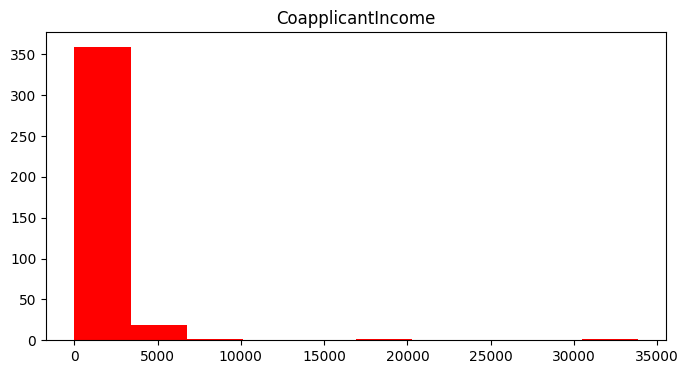

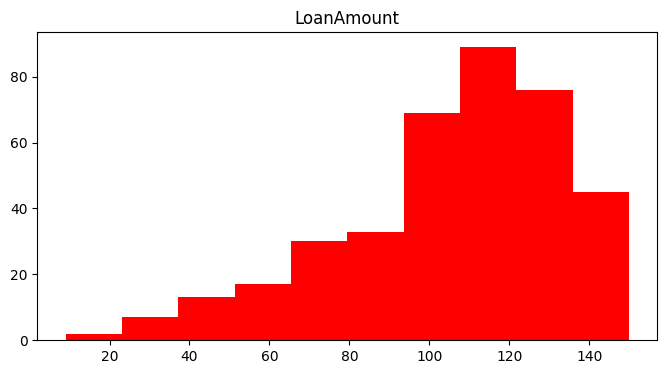

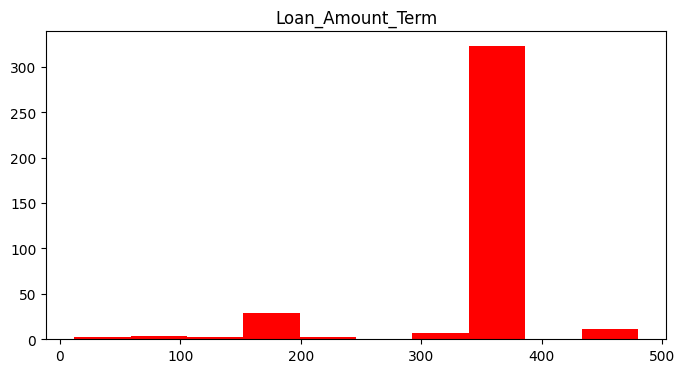

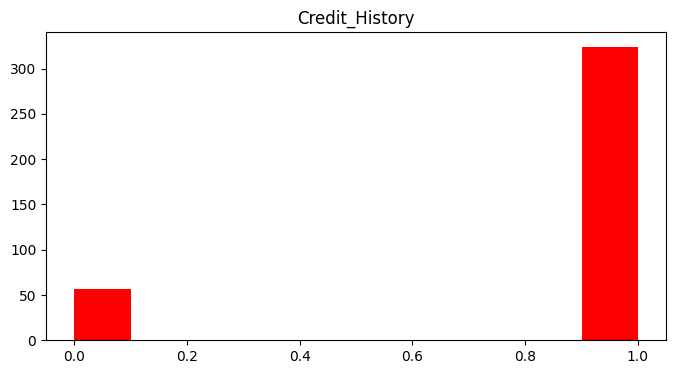

In [ ]:
#Lặp qua các giá trị của các cột loan_num lấy dữ liệu và dùng thư viện matplotlib để vẽ biểu đồ cho từng cột
for i in loan_num: #i là tên của từng cột trong ds
    plt.figure(figsize=(8, 4)) #tạo figure vs sz 8 4
    plt.hist(loan_num[i], color='red') #vẽ biểu đồ hist
    plt.title(i) #tên của biểu đồ là tên cột hiện tại
    plt.show()

vẽ loan_cat


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

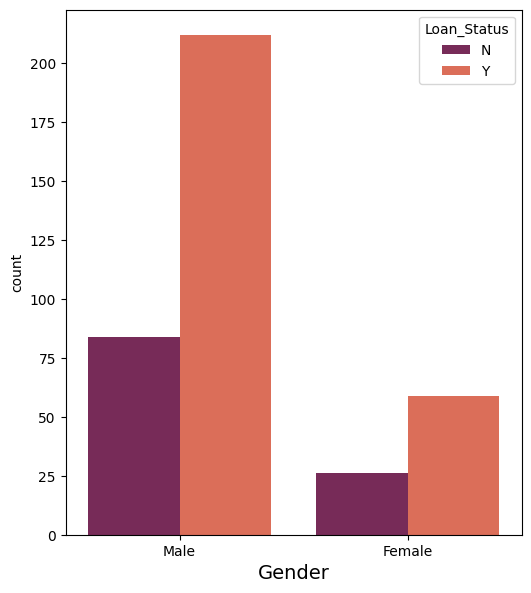

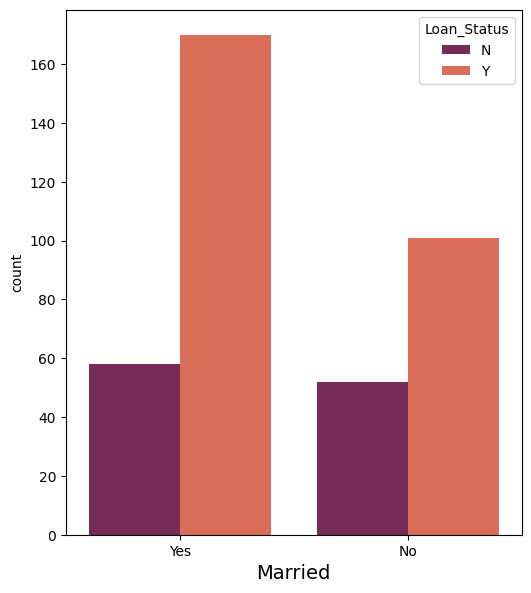

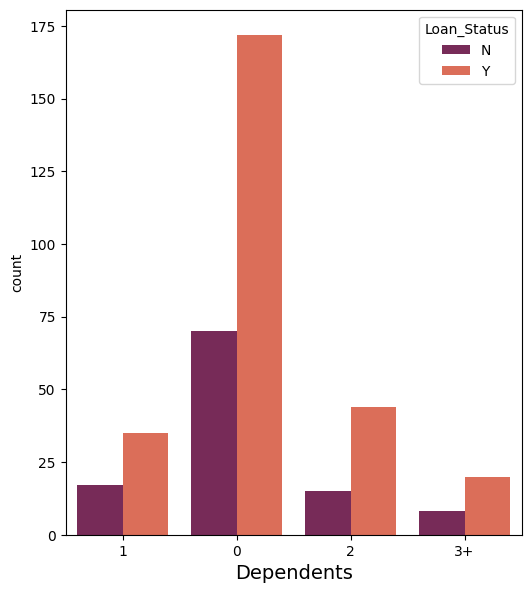

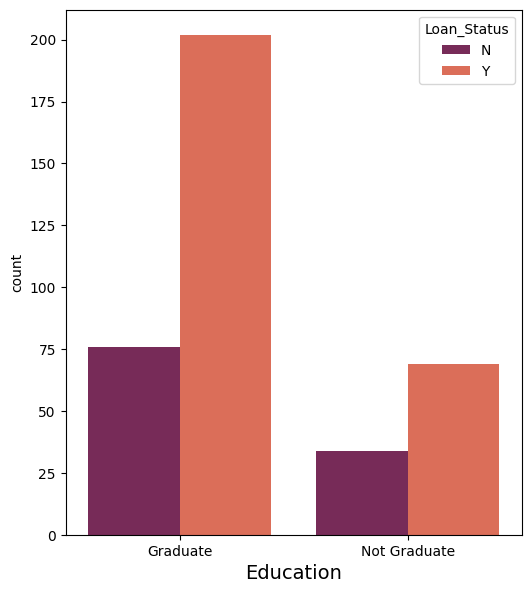

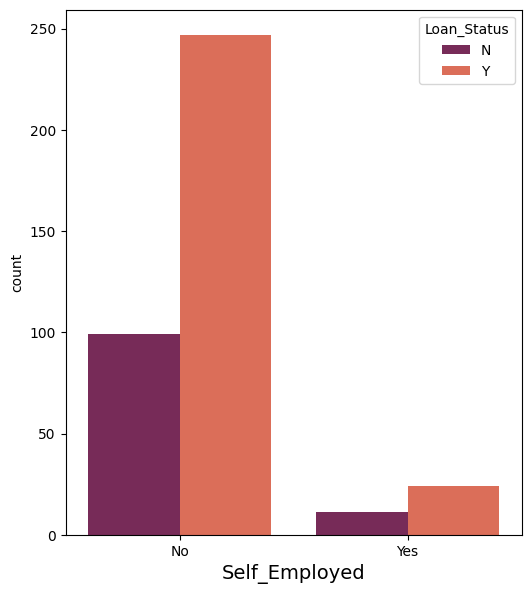

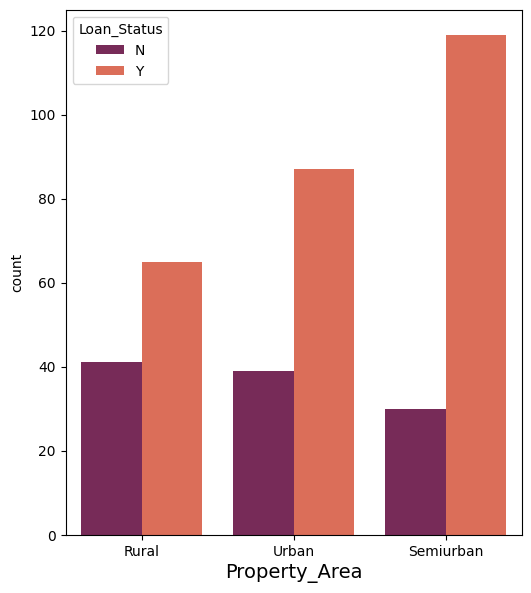

In [ ]:
#Vẽ biểu đồ theo giá trị các cột loan_cat trừ cột loan_status:
for i in cat[:-1]:   # Lấy tất cả các cột trong ds cat ngoại trừ cột cuối cùng (cột "Loan_Status").
    plt.figure(figsize=(20,15))
    plt.subplot(2,3,1)
    sns.countplot(x=i ,hue='Loan_Status', data=Tr_data ,palette='rocket')
    # chọn cột phân loại i làm trục x, phân loại màu theo loan_status, dữ liệu là Tr_data, bảng màu plasma
    plt.xlabel(i, fontsize=14)

Chuyển đổi dữ liệu phân loại thành số

In [10]:
#thay đổi các dữ liệu chữ về dạng số

to_numeric = {   #Tạo một dictionary gọi là to_numeric
'Male': 1, 'Female': 2,
'Yes': 1, 'No': 2,
'Graduate': 1, 'Not Graduate': 2,
'Urban': 3, 'Semiurban': 2,'Rural': 1,
'Y': 1, 'N': 0,
'3+': 3}

# thêm các giá trị số mới từ biến to_numeric vào tập dữ liệu
# quét qua từng ô dữ liệu với lambda
Tr_data = Tr_data.applymap(lambda lable: to_numeric.get(lable) if lable in to_numeric else lable)
#lambda lable: Tạo một hàm vô danh (anonymous function) nhận vào một giá trị.
#to_numeric.get(lable): Kiểm tra xem giá trị có trong dictionary to_numeric không. Nếu có, lấy giá trị số tương ứng; nếu không, giữ nguyên giá trị đó.

# chuyển đổi cột Dependents
Dependents_ = pd.to_numeric(Tr_data.Dependents)

# Bỏ cột Dependents trước đó
Tr_data.drop(['Dependents'], axis = 1, inplace = True)

# Gán cột dữ liệu Dependents mới vào tập dữ liệu
Tr_data = pd.concat([Tr_data, Dependents_], axis = 1)

# Kiểm tra lại toàn bộ tập dữ liệu
print(f"training set (row, col): {Tr_data.shape}")
print(Tr_data.info())

training set (row, col): (381, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381 entries, 0 to 380
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             381 non-null    int64  
 1   Married            381 non-null    int64  
 2   Education          381 non-null    int64  
 3   Self_Employed      381 non-null    int64  
 4   ApplicantIncome    381 non-null    int64  
 5   CoapplicantIncome  381 non-null    float64
 6   LoanAmount         381 non-null    float64
 7   Loan_Amount_Term   381 non-null    float64
 8   Credit_History     381 non-null    float64
 9   Property_Area      381 non-null    int64  
 10  Loan_Status        381 non-null    int64  
 11  Dependents         381 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 35.8 KB
None


<ipython-input-10-b9bb98a0b80c>:13: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  Tr_data = Tr_data.applymap(lambda lable: to_numeric.get(lable) if lable in to_numeric else lable)


 chia tập dữ liệu Tr_data thành các đặc trưng (features) và nhãn (labels), sau đó phân chia tập dữ liệu thành tập huấn luyện (training set) và tập kiểm tra (test set).

In [11]:
# Chia tập train thành features (X) và labels (y)
X_data = Tr_data.drop('Loan_Status', axis = 1)  #bỏ cột loan_status,  1 dataframe chứa tất cả các cột khác , được dùng là features
y_data = Tr_data['Loan_Status'] #chọn cột loan_status , được dùng là nhãn label

#Split data ( phân chia dl )  // pasdan + sklearn
from sklearn.model_selection import train_test_split   #hàm train_test_split từ TV sklearn để chia dữ liệu thành training set và test set
X_train, X_test, y_train, y_test = train_test_split(
     X_data, y_data, test_size=0.2, random_state=42)   #20% dữ liệu sẽ dc dùng cho testset , 80% cho trainingset

#in kích thước 2 tập và trả về số lượng phần tử
print ("Training size: %d" %len(y_train))
print ("Test size    : %d" %len(y_test))

Training size: 304
Test size    : 77


In [ ]:
# matrix = X_data.corr()

# plt.figure(figsize=(12,8))
# sns.heatmap(matrix, annot=True, linewidth=0.5, fmt='.2f', cmap='viridis')

In [12]:
#Chuẩn hóa dữ liệu
from sklearn.preprocessing import StandardScaler #StandardScaler để chuẩn hóa dữ liệu

scaler = StandardScaler() #tạo 1 đt scaler
X_train_scaler = scaler.fit_transform(X_train)
X_test_scaler = scaler.transform(X_test)


Lựa chọn thuộc tính tốt nhất . Sử dụng thuật toán ID3 sử dụng Entropy.



In [ ]:
# import math
# from collections import Counter
# import numpy as np

# def entropy(labels):
#     """ Computes entropy of 0-1 vector. """
#     n_labels = len(labels)

#     if n_labels <= 1:
#         return 0

#     counts = np.bincount(labels)
#     probs = counts[np.nonzero(counts)] / n_labels
#     n_classes = len(probs)

#     if n_classes <= 1:
#         return 0
#     return - np.sum(probs * np.log(probs)) / np.log(n_classes)

# # Trích xuất nhãn 'Loan_Status' từ dữ liệu
# # Thay đổi Tr_data thành Tr_data.to_dict('records') để lấy danh sách các dictionary
# labels = [record['Loan_Status'] for record in Tr_data.to_dict('records')]

# # Tính entropy và in kết quả
# entropy_value = entropy(labels)
# print("Entropy của toàn bộ tập dữ liệu là:", entropy_value)


In [ ]:
# from scipy.stats import entropy
# import pandas as pd
# def information_gain(members, split):
#     '''
#     Measures the reduction in entropy after the split
#     :param v: Pandas Series of the members
#     :param split:
#     :return:
#     '''
#     entropy_before = entropy(members.value_counts(normalize=True))
#     split.name = 'split'
#     members.name = 'members'
#     grouped_distrib = members.groupby(split) \
#                         .value_counts(normalize=True) \
#                         .reset_index(name='count') \
#                         .pivot_table(index='split', columns='members', values='count').fillna(0)
#     entropy_after = entropy(grouped_distrib, axis=1)
#     entropy_after *= split.value_counts(sort=False, normalize=True)
#     return entropy_before - entropy_after.sum()

# members = pd.Series(['yellow','yellow','green','green','blue'])
# split = pd.Series([0,0,1,1,0])
# print (information_gain(members, split))

0.6730116670092565


# *CÂY QUYẾT ĐỊNH DECISION TREE*

In [ ]:
# from sklearn.tree import DecisionTreeClassifier, plot_tree
# import matplotlib.pyplot as plt
# #Khởi tạo mô hình Decision Tree
# clf = DecisionTreeClassifier(random_state=42, criterion='gini', max_depth=3)

# # Huấn luyện mô hình
# clf.fit(X_train_scaler, y_train)

# # Dự đoán nhãn cho tập kiểm tra
# y_pred = clf.predict(X_test_scaler)


# print(classification_report(y_test, y_pred))

# # Đánh giá độ chính xác
# accuracy_tree = accuracy_score(y_test, y_pred)
# print ("Accuracy: %.2f %%" %(100*accuracy_score(y_test, y_pred)))
# # Vẽ cây quyết định
# plt.figure(figsize=(10, 7))
# plot_tree(clf, filled=True, feature_names=X_data.columns, class_names=['No', 'Yes'])
# plt.title('Decision Tree for Loan Approval')
# plt.show()

Accuracy: 81.82 %


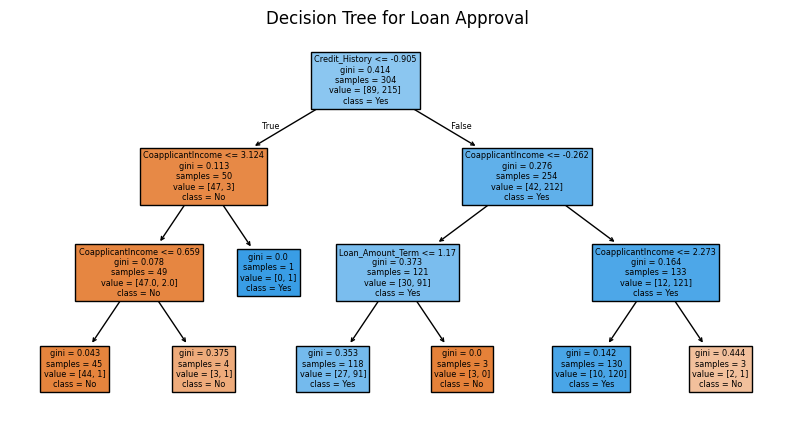

In [13]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
#Khởi tạo mô hình Decision Tree
clf = DecisionTreeClassifier(random_state=42, criterion='gini', max_depth=3)

# Huấn luyện mô hình
clf.fit(X_train_scaler, y_train)  #.fit(...) khi gọi phương thức này, mô hình sẽ học từ dữ liệu đầu vào
                                  #trước khi gọi fit thì tập X đc scaler để đảm bảo các feature có cùng quy mô
                                  #y train -> mô hình sẽ dùng thông tin này để học cách phân loại

# Dự đoán nhãn cho tập kiểm tra
y_test_pred = clf.predict(X_test_scaler)    #predict() : sd để sự đoán nhãn cho dữ liệu mới -> kết quả dự đoán sẽ dc lưu vào y test pred
                                            #X test :là tập dữ liệu khác cần dc scaler (=  test set đã được scaler trước khi đưa vào tt để dự đoán,  chứa các đặc trưng của tập kiểm tra
                                            # kq sẽ là mảng chứa các nhãn dự đoán : 0 1

# Đánh giá độ chính xác
accuracy_tree = accuracy_score(y_test, y_test_pred)

# Đánh giá độ chính xác
accuracy_tree = accuracy_score(y_test, y_test_pred)
print ("Accuracy: %.2f %%" %(100*accuracy_score(y_test, y_test_pred)))

# Vẽ cây quyết định
plt.figure(figsize=(10, 5))
plot_tree(clf, filled=True, feature_names=X_data.columns, class_names=['No', 'Yes'])
plt.title('Decision Tree for Loan Approval')
plt.show()

#accuracy_train = accuracy_score(y_train, y_train_pred)  # Độ chính xác tập huấn luyện
#accuracy_test = accuracy_score(y_test, y_test_pred)     # Độ chính xác tập kiểm tra

#print("Accuracy on Training Set: %.2f%%" % (accuracy_train * 100))
#print("Accuracy on Test Set: %.2f%%" % (accuracy_test * 100))
#print(classification_report(y_test, y_test_pred)) # Changed y_pred to y_test_pred



In [ ]:
# DT= DecisionTreeClassifier()
# param_grid = {
#         'max_depth' : [10, 20, 30, 40],
#         'min_samples_split' : [2, 5 , 10, 20 ]}
# dt =  GridSearchCV(DT,param_grid , scoring='accuracy', cv=5)

# dt.fit(X_train, y_train)
# print ("Best hyperpara for Decision Tree:", dt.best_params_)

# # Đánh giá hiệu suất trên tập test
# y_pred = dt.predict(X_test)
# print("Độ đo hiệu suất trên tập test:", accuracy)
# print (" Best accuracy for Decison Tree ", dt.best_score_)

# from sklearn.tree import DecisionTreeClassifier, plot_tree
# import matplotlib.pyplot as plt
# #Khởi tạo mô hình Decision Tree
# clf = DecisionTreeClassifier()
# param_grid =  {
#         'max_depth' : [ 10, 20, 30, 40],
#         'min_samples_split' : [2, 10 , 20 ]}
# clf = GridSearchCV(clf,param_grid , scoring='accuracy', cv=5)


# # Huấn luyện mô hình
# clf.fit(X_train_scaler, y_train)

# # Dự đoán nhãn cho tập kiểm tra và tập huấn luyện
# y_test_pred = clf.predict(X_test_scaler)
# y_train_pred = clf.predict(X_train_scaler)

# accuracy_train = accuracy_score(y_train, y_train_pred)
# accuracy_test = accuracy_score(y_test, y_test_pred)


# print ("Best hyperpara for Decision Tree:", dt.best_params_)

# print("Accuracy on Training Set: %.2f%%" % (accuracy_train * 100))
# print("Accuracy on Test Set: %.2f%%" % (accuracy_test * 100))

#-> bị OvFt






Best hyperpara for Decision Tree: {'max_depth': 10, 'min_samples_split': 20}
Accuracy on Training Set: 89.47%
Accuracy on Test Set: 76.62%


In [14]:
#Tối Ưu Hóa Hyperparameter
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
#Khởi tạo mô hình Decision Tree
clf = DecisionTreeClassifier()
param_grid =  {
    'max_depth': [ 5, 7, 10  ],
    'min_samples_split': [ 7, 10, 15 ],  #số lượng mẫu tối thiểu cho 1 nút
    'min_samples_leaf': [1, 3, 5 ] } #số lượng mẫu tối thiểu cần có ở một nút lá

clf = GridSearchCV(clf,param_grid , scoring='accuracy', cv=5)


# Huấn luyện mô hình
clf.fit(X_train_scaler, y_train)

# Dự đoán nhãn cho tập kiểm tra và tập huấn luyện
y_test_pred = clf.predict(X_test_scaler)
#y_train_pred = clf.predict(X_train_scaler)

#accuracy_train = accuracy_score(y_train, y_train_pred)
accuracy_test = accuracy_score(y_test, y_test_pred)


print ("Best hyperpara for Decision Tree:", clf.best_params_)

#print("Accuracy on Training Set: %.2f%%" % (accuracy_train * 100))
print("Accuracy on Test Set: %.2f%%" % (accuracy_test * 100))


Best hyperpara for Decision Tree: {'max_depth': 7, 'min_samples_leaf': 3, 'min_samples_split': 15}
Accuracy on Test Set: 74.03%


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


# MÔ HÌNH *RANDOMFOREST*

In [15]:
# Khởi tạo mô hình RandomForest
ranf = RandomForestClassifier()
ranf.fit(X_train, y_train)

y_predict = ranf.predict(X_test)

# Accuracy score
accuracy_rand = accuracy_score(y_predict,y_test)
print("Accuracy: %.2f %%" %(100*accuracy_rand))

Accuracy: 80.52 %


In [ ]:
#TỐI ƯU HÓA HYPERPARAMETER
# Định nghĩa các tham số cần tối ưu cho RandomForestClassifier
rf_parameters = {
    'n_estimators': [50, 100, 200],  # Số lượng cây trong rừng
    'criterion': ['gini', 'entropy'],   # Hàm đo lường chất lượng chia
    'max_depth': np.arange(1, 5, 2),  # Số lượng tầng tối đa của cây
    'min_samples_split': np.arange(2, 11, 2),   # Số lượng mẫu tối thiểu cần thiết để phân chia một nút
    'max_leaf_nodes': np.arange(3, 26, 2)  # Số lượng nút lá tối đa
}

# Sử dụng GridSearchCV để tìm ra bộ tham số tốt nhất cho RandomForestClassifier
rf_grid = GridSearchCV(RandomForestClassifier(), rf_parameters, cv=5, n_jobs=-1)
rf_grid.fit(X_train, y_train)

# Dự đoán trên tập kiểm tra
y_pred_rf = rf_grid.predict(X_test)

# In ra bộ tham số tốt nhất
print("Best Parameters:", rf_grid.best_params_)

# Độ chính xác của mô hình tốt nhất
accuracy_rf = metrics.accuracy_score(y_test, y_pred_rf)
print ("Accuracy: %.2f %%" %(100*accuracy_rf))

Best Parameters: {'criterion': 'gini', 'max_depth': 3, 'max_leaf_nodes': 13, 'min_samples_split': 10, 'n_estimators': 100}
Accuracy: 81.82 %


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


# *MÔ HÌNH LOGISTIC REGRESSION*

In [16]:
# Khởi tạo mô hình Logistic Regression
LR = LogisticRegression()

# Huấn luyện mô hình
LR.fit(X_train, y_train)

# Dự đoán trên tập test
y_predict = LR.predict(X_test)

# Accuracy score
accuracy_logis= accuracy_score(y_predict,y_test)
print("Accuracy: : %.2f %%" %(100*accuracy_score(y_predict,y_test)))

#RA 81,82%

Accuracy: : 81.82 %


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
#TỐI ƯU HÓA Hyperpara
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Giả sử X là ma trận đặc trưng, y là vector nhãn
# Chia dữ liệu thành tập train và tập test

# Định nghĩa mô hình Logistic Regression
logistic_regression = LogisticRegression()

# Định nghĩa các tham số cần tinh chỉnh và giá trị thử nghiệm
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'max_iter': [100, 200, 300,400]
}

# Sử dụng GridSearchCV để tìm tham số tối ưu
grid_search = GridSearchCV(logistic_regression, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# In ra tham số tối ưu
print("Tham số tối ưu:", grid_search.best_params_)

# Đánh giá hiệu suất trên tập test
y_pred = grid_search.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(" đo hiệu suất trên tập test:", accuracy)

#Tham số tối ưu: {'C': 1, 'max_iter': 100, 'penalty': 'l2'}
# đo hiệu suất trên tập test: 0.8181818181818182

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Tham số tối ưu: {'C': 1, 'max_iter': 100, 'penalty': 'l2'}
 đo hiệu suất trên tập test: 0.8181818181818182


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:1103: UserWarning: One or more of the test scores are non-finite: [       nan 0.70726776        nan 0.71054645        nan 0.71054645
        nan 0.71054645        nan 0.71060109        nan 0.71387978
        nan 0.71387978        nan 0.71387978        nan 0.83224044
        nan 0.82896175        nan 0.82896175        nan 0.82896175
        nan 0.8552459         nan 0.85196721        nan 0.85196721
        nan 0.85196721        nan 0.8552459         nan 0.85196721
        nan 0.85196721        nan 0.85196721        nan 0.8552459
        nan 0.84868852        nan 0.85196721        nan 0.85196721]
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/prep

In [17]:
# Dự đoán trên tập train
y_train_predict = LR.predict(X_train)

# Đánh giá độ chính xác trên tập huấn luyện
accuracy_train = accuracy_score(y_train_predict, y_train)
print("Accuracy on Training Set: : %.2f %%" %(100 * accuracy_train))

Accuracy on Training Set: : 85.20 %


In [18]:
score = [accuracy_test, accuracy_logis, accuracy_rand]
Models = pd.DataFrame({
    'model': ["Decision Tree", "Logistic Regression", "Random Forest"],
    'Score': score})
Models.sort_values(by='Score', ascending=False)

,model,Score
1,Logistic Regression,0.818182
2,Random Forest,0.805195
0,Decision Tree,0.740260


In [ ]:
print(Tr_data.columns)

Index(['Gender', 'Married', 'Education', 'Self_Employed', 'ApplicantIncome',
       'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History',
       'Property_Area', 'Loan_Status', 'Dependents'],
      dtype='object')


In [ ]:
print(Tr_data.head())

   Gender  Married  Education  Self_Employed  ApplicantIncome  \
0       1        1          1              2             4583   
1       1        1          1              1             3000   
2       1        1          2              2             2583   
3       1        2          1              2             6000   
4       1        1          2              2             2333   

   CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
0             1508.0       128.0             360.0             1.0   
1                0.0        66.0             360.0             1.0   
2             2358.0       120.0             360.0             1.0   
3                0.0       141.0             360.0             1.0   
4             1516.0        95.0             360.0             1.0   

   Property_Area  Loan_Status  Dependents  
0              1            0           1  
1              3            1           0  
2              3            1           0  
3           

In [ ]:
# all_predictions = LR.predict(Tr_data)
# Tr_data['Decision'] = all_predictions
# print(Tr_data['Loan_ID', 'Decision'])

In [ ]:
# all_predictions = LR.predict(Tr_data)
# results = Tr_data.copy()


# results['Decision'] = LR.predict(Tr_data)

# print(results[[ 'Decision']])


all_predictions = LR.predict(Tr_data.drop( ['Loan_Status','Decision'], axis=1, errors='ignore'))
Tr_data['Decision'] = all_predictions
print(Tr_data['Decision'])


0      1
1      1
2      1
3      1
4      1
      ..
376    1
377    1
378    1
379    1
380    0
Name: Decision, Length: 381, dtype: int64


In [19]:
all_predictions = LR.predict(Tr_data.drop( ['Loan_Status','Decision'], axis=1, errors='ignore'))
Tr_data['Decision'] = all_predictions

if 'loan_ids' not in Tr_data.columns:
  Tr_data['loan_ids'] = loan_ids
print(Tr_data[['loan_ids','Decision']])

     loan_ids  Decision
0    LP001003         1
1    LP001005         1
2    LP001006         1
3    LP001008         1
4    LP001013         1
..        ...       ...
376  LP002953         1
377  LP002974         1
378  LP002978         1
379  LP002979         1
380  LP002990         0

[381 rows x 2 columns]


In [ ]:
# def find_customer_by_loan_ids(loan_ids):
#     customer = Tr_data[Tr_data['loan_ids'] == loan_ids]
#     if not customer.empty:
#         return customer
#     else:
#         return "Khách hàng không tồn tại."

#         # Nhập Loan_ID từ người dùng

# loan_ids_to_search = input("Nhập Loan_ID để tìm kiếm: ")

# # Gọi hàm và lưu kết quả
# result = find_customer_by_loan_ids(loan_ids_to_search)

# # In ra kết quả
# print(result)




Nhập Loan_ID để tìm kiếm: LP001013
   Gender  Married  Education  Self_Employed  ApplicantIncome  \
4       1        1          2              2             2333   

   CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
4             1516.0        95.0             360.0             1.0   

   Property_Area  Loan_Status  Dependents  Decision  loan_ids  
4              3            1           0         1  LP001013  


In [4]:
from google.colab import files
files.download('script.py')


FileNotFoundError: Cannot find file: script.py